In [5]:
keywords = {
    "general": ["mental health", "wellbeing", "psychological health"],
    "specific_to_depression": ["depression", "depressed", "hopeless", "sadness", "melancholy", "dysthymia", "anhedonia", "low mood"],
    "symptoms_and_expressions": ["fatigue", "sleep problems", "insomnia", "worthlessness", "guilt", "concentration problems", "appetite changes", "suicidal thoughts", "no energy", "feeling empty"],
    "treatment_and_help_seeking": ["therapy", "counseling", "antidepressants", "support group", "mental health help", "psychologist", "psychiatrist"],
    "social_and_emotional_indicators": ["lonely", "isolated", "overwhelmed", "anxious", "stressed"],
    "hashtags": ["#MentalHealthAwareness", "#Depression", "#MentalHealthMatters", "#EndTheStigma"]
}
q = []
for k in keywords:
    q += keywords[k]
qq = "|".join(q)
qq
    

'mental health|wellbeing|psychological health|depression|depressed|hopeless|sadness|melancholy|dysthymia|anhedonia|low mood|fatigue|sleep problems|insomnia|worthlessness|guilt|concentration problems|appetite changes|suicidal thoughts|no energy|feeling empty|therapy|counseling|antidepressants|support group|mental health help|psychologist|psychiatrist|lonely|isolated|overwhelmed|anxious|stressed|#MentalHealthAwareness|#Depression|#MentalHealthMatters|#EndTheStigma'

In [6]:
%%time
import pandas as pd
from pandarallel import pandarallel
import os
from tqdm.notebook import tqdm,trange
pandarallel.initialize(progress_bar=True,nb_workers=60)
tqdm.pandas()

def filter_key_words(row,q= qq):
    df = pd.read_parquet(row["file_path"])
    # print(df.columns)
    df = df[df["text"].str.contains(q,  case=False,na=False)]
    if not df is None:
        if df.shape[0] !=0:
            # df.to_parquet(row["out_path"]) 
            return df
    return None
    # return df

input_path =  "/n/holyscratch01/cga/xiaokang/geo-tweets/merged_sentiment_twitter/"
out_path = "/n/holyscratch01/cga/xiaokang/mental_health/"
os.makedirs(out_path,exist_ok=True)


batches = pd.DataFrame([ {"file_path":input_path + file_name,"out_path":out_path+file_name,"file_name":file_name} for file_name in os.listdir(input_path) if ".parquet" in file_name])
# batches = batches.head()
data = pd.concat([df for df in batches.parallel_apply(filter_key_words,axis=1).values if df is not None])
# data = pd.concat([df for df in batches.progress_apply(filter_key_words,axis=1).values if df is not None])
if data is not None:
    data.to_parquet("%s/mental_health_2023-11-28.parquet"%out_path)
    # break

INFO: Pandarallel will run on 60 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


CPU times: user 2min 1s, sys: 18.5 s, total: 2min 20s
Wall time: 1h 37min 11s


In [7]:
data["date_s"] = data.date.dt.date

In [13]:
data.head()

,message_id,date,text,tags,tweet_lang,source,place,geom,retweets,tweet_favorites,...,user_favorites,status,user_lang,latitude,longitude,data_source,GPS,spatialerror,score,date_s
2214,1396194363814916098,2021-05-22 20:00:51,"Child hood trauma leads to severe anxiety, sev...",MentalHealthAwarenessMonth,en,"<a href=""http://twitter.com/download/iphone"" r...","Pennsylvania, USA","POLYGON((-80.519851 39.719801,-80.519851 42.51...",0,0,...,4177,13442,None,41.117936500000006,-77.604684,{3},False,219831.37663514374,0.310798,2021-05-22
2910,1396194427652222976,2021-05-22 20:01:06,I did not say he is guilty or not.,None,en,"<a href=""http://twitter.com/download/android"" ...","Kimberley, South Africa","POLYGON((24.707953 -28.809748,24.707953 -28.68...",0,0,...,27063,2395,None,-28.745686,24.763833,{3},False,7024.414365145757,0.296902,2021-05-22
2949,1396194429531213828,2021-05-22 20:01:06,@dredMMAcrypto @stacysm92154858 @EbanieBridges...,None,en,"<a href=""http://twitter.com/download/android"" ...","Belfast, Northern Ireland","POLYGON((-6.036116 54.543241,-6.036116 54.6484...",0,0,...,192,1580,None,54.595869,-5.928413,{3},False,7205.966422680896,0.735438,2021-05-22
3348,1396194469502926850,2021-05-22 20:01:16,MTG needs mental health care. Pay attention.,None,en,"<a href=""http://twitter.com/download/iphone"" r...","West Bloomfield Township, MI","POLYGON((-83.441942 42.52605,-83.441942 42.617...",0,0,...,975,601,None,42.571954,-83.38116600000001,{3},False,5691.893323686785,0.515247,2021-05-22
3624,1396194494333194249,2021-05-22 20:01:22,"Even if it feels like you are trapped, There i...","mentalhealth,mentalhealthawareness,suicideprev...",en,"<a href=""http://instagram.com"" rel=""nofollow"">...","Los Angeles, CA",POINT(-118.25 34.03938),0,0,...,1552,11997,None,34.03938,-118.25,{3},True,10.0,0.539588,2021-05-22


In [8]:
%%time
temp = data.groupby("date_s").count()["message_id"]

CPU times: user 29.1 s, sys: 2.06 s, total: 31.1 s
Wall time: 31.2 s


In [15]:
data.shape

(14656280, 27)

In [9]:
temp.head()

date_s
2011-07-06     1
2011-12-31     1
2012-01-02    25
2012-01-03    44
2012-01-04    27
Name: message_id, dtype: int64

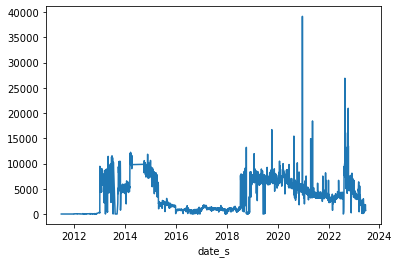

In [10]:
temp.plot();

In [12]:
temp.head()

date_s
2011-07-06     1
2011-12-31     1
2012-01-02    25
2012-01-03    44
2012-01-04    27
Name: message_id, dtype: int64

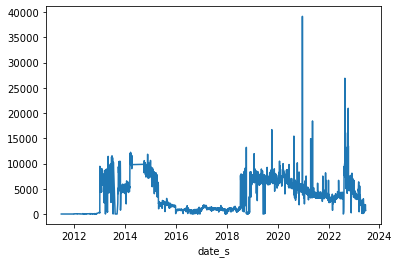

In [11]:
temp.sort_index().plot();